## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
!head Data/countries_info.csv

'head' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [2]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [12]:
# Write your code here
happiness = pd.read_csv(HAPPINESS_DATASET)
countries = pd.read_csv(COUNTRIES_DATASET, decimal = ',')

In [13]:
countries.head(1)

,country_name,area,population,literacy
0,afghanistan,647500,31056997,36.0


In [17]:
happiness['country'] = happiness['country'].str.lower()

In [18]:
happiness.head(1)

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,afghanistan,2.5669,0.470367,52.59,0.396573,-0.096429,0.933687,South Asia


In [23]:
print(len(happiness.columns))
print(len(countries.columns))

8
4


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [19]:
# Write your code here
country_features = pd.merge(happiness, countries, left_on = 'country', right_on = 'country_name', how = 'outer')

In [24]:
print(len(country_features.columns))
country_features.head(1)

12


,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_name,area,population,literacy
0,afghanistan,2.5669,0.470367,52.59,0.396573,-0.096429,0.933687,South Asia,afghanistan,647500,31056997,36.0


In [25]:
country_features.drop(['country_name'], axis = 1)

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,70.0
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,97.1
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,98.6
...,...,...,...,...,...,...,...,...,...,...,...
130,venezuela,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean,912050,25730435,93.4
131,vietnam,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia,329560,84402966,90.3
132,yemen,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa,527970,21456188,50.2
133,zambia,3.7594,0.698824,55.299377,0.806500,0.078037,0.801290,Sub-Saharan Africa,752614,11502010,80.6


## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [28]:
# Write your code here
happ_score = country_features.sort_values(by = 'happiness_score', ascending= False)
happ_score.head(10)[['country', 'happiness_score']]

,country,happiness_score
38,finland,7.8087
31,denmark,7.6456
115,switzerland,7.5599
50,iceland,7.5045
92,norway,7.4880
87,netherlands,7.4489
114,sweden,7.3535
88,new zealand,7.2996
6,austria,7.2942
72,luxembourg,7.2375


We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [37]:
# Write your code here
avg_hap = country_features.groupby('world_region')['happiness_score'].agg(['mean','size'])
avg_hap.sort_values(by = 'mean', ascending= False)

,mean,size
world_region,,
North America and ANZ,7.173525,4
Western Europe,6.967405,20
Latin America and Caribbean,5.971280,20
Central and Eastern Europe,5.891393,14
Southeast Asia,5.517788,8
East Asia,5.483633,3
Commonwealth of Independent States,5.358342,12
Middle East and North Africa,5.269306,16
Sub-Saharan Africa,4.393856,32


The first region has only a few countries! What are them and what is their score?

In [39]:
# Write your code here
north_america_and_anz = country_features[country_features['world_region'] == 'North America and ANZ'][['happiness_score', 'country_name']]
north_america_and_anz

,happiness_score,country_name
5,7.2228,australia
21,7.2321,canada
88,7.2996,new zealand
127,6.9396,united states


## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [43]:
country_features.head(1)

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_name,area,population,literacy
0,afghanistan,2.5669,0.470367,52.59,0.396573,-0.096429,0.933687,South Asia,afghanistan,647500,31056997,36.0


In [44]:
# Write your code here
literate_100 = country_features[country_features['literacy'] == 100]
literate_100.head(15)['country_name']

5      australia
31       denmark
38       finland
72    luxembourg
92        norway
Name: country_name, dtype: object

What is the global average?

In [45]:
# Write your code here
print('global average literacy: ', country_features['literacy'].mean(), '%')

global average literacy:  81.85112781954888 %


Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [46]:
# Write your code here
below_50 = country_features[country_features['literacy'] <= 50]
print('proportion below 50 % : ', len(below_50)/len(country_features) * 100, '%')

proportion below 50 % :  11.851851851851853 %


Print the raw number and the percentage of world population that is illiterate.

In [47]:
country_features.head(1)

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_name,area,population,literacy
0,afghanistan,2.5669,0.470367,52.59,0.396573,-0.096429,0.933687,South Asia,afghanistan,647500,31056997,36.0


In [51]:
# Write your code here
country_features['illiterate'] = country_features['population'] * (1 - country_features['literacy']/100)
print('total world pop that is illiterate = ', country_features['illiterate'].sum())
print('percentage of world pop that is illiterate = ', (country_features['illiterate'].sum())/(country_features['population'].sum()) * 100, '%')

total world pop that is illiterate =  1249372988.1030002
percentage of world pop that is illiterate =  20.32996582965084 %


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [53]:
# Write your code here
country_features['population_density'] = country_features['population']/country_features['area']
country_features.head(1)

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_name,area,population,literacy,illiterate,population_density
0,afghanistan,2.5669,0.470367,52.59,0.396573,-0.096429,0.933687,South Asia,afghanistan,647500,31056997,36.0,19876478.08,47.964474


What is the happiness score of the 3 countries with the lowest population density?

In [55]:
# Write your code here
lower_pop_dens = country_features.sort_values(by = 'population_density', ascending = True)[['happiness_score', 'country_name']]
lower_pop_dens.head(3)

,happiness_score,country_name
83,5.4562,mongolia
5,7.2228,australia
14,3.4789,botswana


## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

Text(0.5, 1.0, 'happiness score vs healthy life expectancy')

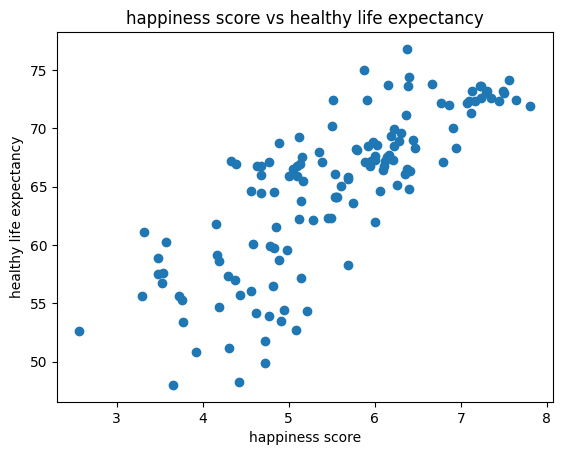

In [57]:
# Write your code here
import matplotlib.pyplot as plt 
plt.scatter(country_features['happiness_score'], country_features['healthy_life_expectancy'])
plt.xlabel('happiness score')
plt.ylabel('healthy life expectancy')
plt.title('happiness score vs healthy life expectancy')

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.